## PANDAS:   
        - DataFrame() | .loc    |  .head(), .tail()   |  pd.unique()    | df.describe()
        - IMPORT        --> .read_csv ()    
        - DATA TYPES    -->df[].astype()     
        - WORKING WITH STRINGS -->delete spaces, all to lower case, find and replace, switch the columns, transform it into a list  
        -  "     "     DATES   -->   
        - MISSING DATA  --> df.isna() | df.groupby(by=[]).max()  | df.dropna()  | df.fillna(0) | df.interpolate()    
        - lambda, apply(), map(), applymap()
        - GROUPBY()     --> df.groupby([""].agg({}))  | set_group("").head()  | filter
        - PIVOT         --> df.pivot(index='',columns='',values='')   | df.stack() / .unstack()   | df.melt() ("identify ID variables")                 
        - MERGE/CONCAT  --> df.merge(df2, ...) | pd.concat ([df,df2]) | df.append() | df.join()             
        - CATEGORIZING/LABELING-->  ... | pd.cut  | pd.map (map new column matching X)  | pd.Categorical()  | df.sort_values(by =)  | pd.get_dummies                 
        - PLOTTING    
        - STATISTICS               
        - GeoPandas



In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


scores = {"name":["Ray","Japhy","Zosa"],
          "city":["SF","SF","Denver"],
          "score":[75,92,94]}
df=pd.DataFrame(scores)
df.describe()
print(pd.unique(df["name"]))

#------  Basic row,column, creation new
df["score"]  # return a column
df.loc[1:2]                                 #return rows
df.loc[1,"score"]                           #one value 
df["name_city"] = df["name"]+"_"+df["city"] #new column combining 
df[df["score"]>90]                          #shows columns if >90

#pd.set_option("max_rows",10)


['Ray' 'Japhy' 'Zosa']


,name,city,score,name_city
1,Japhy,SF,92,Japhy_SF
2,Zosa,Denver,94,Zosa_Denver


In [22]:
#------  import
iris = pd.read_csv("/Data/pandas_files/iris.csv")

iris.shape      
iris.head()     
iris.tail()
iris.dtypes


#------  Data types
planets = pd.read_csv("/Data/pandas_files/planets.csv")
planets.head()
planets["number"][0].astype(float)                                #convert  type
planets["year_dt"]= pd.to_datetime(planets["year"],format="%Y")   #convert to date type


In [24]:



#------  Working with strings
names = pd.Series(["Pomeray,CODY","Wagner;Jarry","smith,Ray"])
names=names.str.replace(";",",")                                  #find and replace: ; by ,
names.str.len()   #length of charact.
names=names.str.strip()                                           #delete spaces 
names=names.str.lower()                                           #all to lower case
names=names.str.split(", ")                                       #separate the two; create a tupple
names= pd.Series([i[::-1] for i in names])                        #switch the columns
names = ["".join(i) for i in names]                               #transform it into a list 




#------  Working with dates
daterange = pd.period_range("1/1/2020",freq="30d",periods=4)
date_df = pd.DataFrame(daterange,columns=["sample date"])

date_df["date diff"] = date_df["sample date"].diff(periods=1)     #diff: difference among values
date_df["first of month"] = date_df["sample date"].values.astype("datetime64[M]")    #first day of the month
date_df["sample date"] = date_df["sample date"].dt.to_timestamp() #transform  tp datetime64

date_df["sample date"] - date_df["first of month"]                #substract
date_df["sample date"].dt.day_name()                              #actual day of the week




In [25]:


#------  Working with missing data
temps = pd.DataFrame({"sequence":[1,2,3,4,5],
                      "measu_type":["actual","actual","actual",None,"estimated"],
                      "temp_f":[67.24,84.56,91.61,None,49.64]})

temps.isna()                             #check missing values
temps["temp_f"].cumsum()
temps["temp_f"].cumsum(skipna=False)     #if one Na, don't sum it up

temps.groupby(by=["measu_type"]).max()   #groupby by default skip rows if Na --> To include it, by=[..], dropna=False
temps.dropna()                           #drop rows if Na
temps.dropna(axis=1)                     #drop columns if Na

temps.fillna(0)                          #replace Na with 0
temps.fillna(method="pad")               #replace Na with pa method: replace by previous row value
temps.interpolate()                      #replace Na by interpolation (by default, there is many other) 

,sequence,measu_type,temp_f
0,1,actual,67.240
1,2,actual,84.560
2,3,actual,91.610
3,4,None,70.625
4,5,estimated,49.640


In [26]:





#-------  APPLY, MAP, APPLYMAP
#APPLY: harness functions to alter values along an axis in your data frame or series
#LAMBDA: create function in the apply statement without needing to create it in advance
#MAP: substitute each value in a series, using either a function, dict or series
#APPLYMAP: apply a function to each element in the df 


df = pd.DataFrame({"Region":["N","W","E","S","N","W","E","S"],
                   "Team":["One","One","One","One","Two","Two","Two","Two"],
                   "Squad":["A","B","C","D","E","F","G","H"],
                   "Revenue":[7500,5500,2750,6400,2400,3750,1900,575],
                   "Cost":[5200,5100,4400,5300,1250,1300,2100,50]})


df["Profit"] = df.apply(lambda x: "Profit" if x["Revenue"]>x["Cost"] else "Loss", axis=1)  

team_map = {"One":"Red","Two":"Blue"}
df["Team Color"] = df["Team"].map(team_map)

df.applymap(lambda x: len(str(x)))       #returns length of each value in df



#alternative--> for loop
new_col=[]                                                                               #empty list

for i in range(0,len(df)):                                                               #loop over each i up to length of df
    rev = df["Revenue"][i]/df[df["Region"]==df.loc[i,"Region"]]["Revenue"].sum()         
    new_col.append(rev)

df["Rev. share of region"]=new_col
df.sort_values(by="Region")


,Region,Team,Squad,Revenue,Cost,Profit,Team Color,Rev. share of region
2,E,One,C,2750,4400,Loss,Red,0.591398
6,E,Two,G,1900,2100,Loss,Blue,0.408602
0,N,One,A,7500,5200,Profit,Red,0.757576
4,N,Two,E,2400,1250,Profit,Blue,0.242424
3,S,One,D,6400,5300,Profit,Red,0.917563
7,S,Two,H,575,50,Profit,Blue,0.082437
1,W,One,B,5500,5100,Profit,Red,0.594595
5,W,Two,F,3750,1300,Profit,Blue,0.405405


In [30]:




#-------Transform data with groupby
iris = pd.read_csv("/Data/pandas_files/iris.csv")
iris.groupby(["species"]).max()                                   #group by species(3) showing max values or mean, max, min, n (next)
df = iris.groupby(["species"]).agg({"sepal_length":["mean","min","max"],"sepal_width":"count"})

df.columns=["_".join(col).strip() for col in df.columns.values]   #add to column names _min/max...
df.reset_index()


groupings = iris.groupby(["species"])                             #grouping withough aggregating
groupings.get_group("setosa").head()                              #setosa group
groupings.filter(lambda x: x["petal_length"].max()<5)             #max petals 5 of setosa species (the others categories are greater than 5)

groupings.max()                                                   #same as before and same to next          
groupings.apply(lambda x: x.max())



,sepal_length,sepal_width,petal_length,petal_width,species
species,,,,,
setosa,5.8,4.4,1.9,0.6,setosa
versicolor,7.0,3.4,5.1,1.8,versicolor
virginica,7.9,3.8,6.9,2.5,virginica


In [31]:




#-------Pivot
#PIVOT: Allows you to take a variable separating your rows and pivot that to your columns.
df = pd.DataFrame({"Region":['North','West','East','South','North','West','East','South'],
          "Team":['One','One','One','One','Two','Two','Two','Two'],
          "Revenue":[7500,5500,2750,6400,2300,3750,1900,575],
            "Cost":[5200,5100,4400,5300,1250,1300,2100,50]})

df.pivot(index='Region',columns='Team',values='Revenue')        #df: region team rev cost    --> PIVOT: region is index, columns both teams

#STACK:Pivot a level of column labels to rows. Work with a multiindex. 
#UNSTACK:Opposite of stack - pivots level of row labels to columns.
df2 = df.set_index(['Region','Team'])
stacked = pd.DataFrame(df2.stack())                             
stacked.unstack()                                               #reverse stack
stacked.unstack("Region")  

#MELT:Melt allows you to reformat your dataframe to identify columns as "ID variables", 
#     while transforming all other columns, or "measure variables" to the row level.
df.melt(id_vars=['Region','Team'], var_name='value type')       #region & team index variables and pivot rev & cost back to row level




#If there are more than 1 value by group
df.pivot_table(index='Team',values='Revenue')                    #by default: mean to aggreagate
df.pivot_table(index='Team',columns='Region',values='Revenue')  



Region,East,North,South,West
Team,,,,
One,2750,7500,6400,5500
Two,1900,2300,575,3750


In [ ]:


#-------Merge and concatenate
df1 = pd.DataFrame({'letter': ['A', 'B', 'C', 'D'], 'number': [1, 2, 3, 4]})               
df2 = pd.DataFrame({'letter': ['C', 'D', 'E', 'F'], 'number': [3, 4, 5, 6]})

#df.merge                   
df1.merge(df2,how='left',on='number')                              #left joint
df1.merge(df2,how='inner',left_on='number',right_on='number')      #inner joint
df1.merge(df2,how='right',on='number',suffixes=('','_right'))      #right join

#pd.concat
df3 = pd.concat([df1,df2]).drop_duplicates().reset_index(drop=True)#drop duplicates to ensure uniqueness
df4 = pd.concat([df1,df2],axis=1)                                  #axis=1: join horizontally

#df.append
new_row = pd.Series(['Z',26],index=df3.columns)
df3.append(new_row,ignore_index=True)                              #append new row

#df.join
join_df = pd.DataFrame({'letter': ['F','G', 'H', 'I'],
                        'number': [6, 7, 8, 9]})
df2.join(join_df, rsuffix='_right')                                #join dfs using index values


In [32]:


#-------Categorizing and labelling
df = pd.DataFrame({"Species":['Chinook','Chum','Coho','Steelhead','Bull Trout'],
             "Population":['Skokomish','Lower Skokomish','Skokomish','Skokomish','SF Skokomish'],
             "Count":[1208,2396,3220,6245,8216]})

#pd.cut: create bins for numerical data and apply those to df
bins = [0, 2000, 4000, 6000, 8000, np.inf]
labels = ['Low Return', 'Below Avg Return', 'Avg Return', 'Above Avg Return', 'High Return']

df['Count Category'] = pd.cut(df['Count'], bins, labels=labels)

#map
fed_status ={"Chinook":"Threatened", "Chum":"Not Warranted",
             "Coho":"Not Warranted", "Steelhead":"Threatened"}
df['Federal Status'] = df['Species'].map(fed_status)


#pd.Categorical : categorical data type
df['Count Category'] = pd.Categorical(df['Count Category'],
                                      ordered=True,              #clasify: high return has a higher order than above ...
                                      categories=labels)         #pass label from above
                                    
df.sort_values(by=['Count Category'],ascending=False)

#pd.get_dummies
pd.get_dummies(df['Count Category'])


,Low Return,Below Avg Return,Avg Return,Above Avg Return,High Return
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,0,0,1


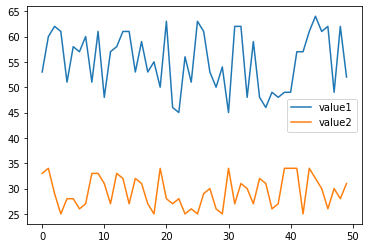

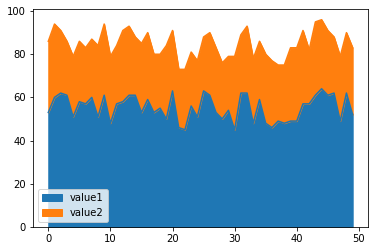

C:\Users\juanp\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


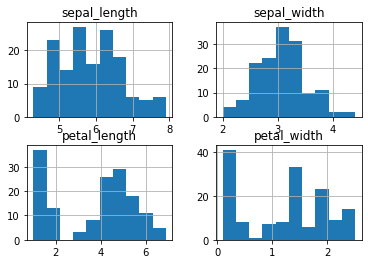

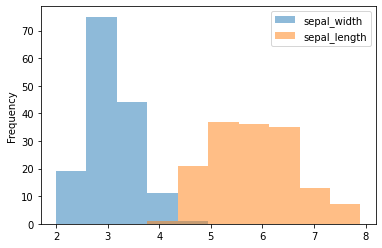

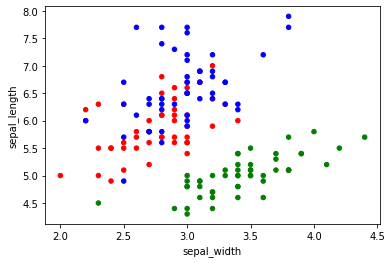

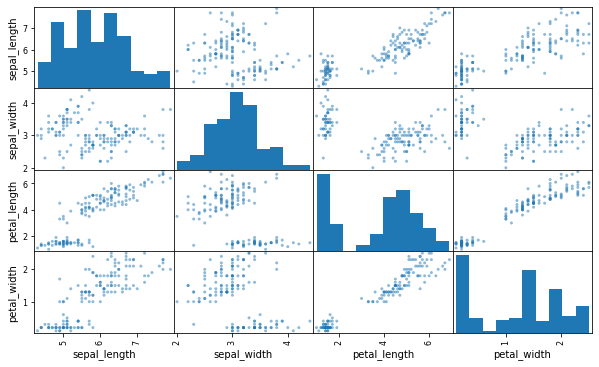

In [33]:





#-------Plotting
daterange = pd.period_range('1/1/1950', freq='1d', periods=50)
date_df = pd.DataFrame(data=daterange,columns=['day'])
date_df['value1'] = np.random.randint(45,65,size=(len(date_df)))
date_df['value2'] = np.random.randint(25,35,size=(len(date_df)))

ax = date_df.plot();                                                            #df.plot()
plt.show()

date_df.plot.area(stacked=True);                                                #df.plot.area()
plt.show()

iris.hist();                                                                    #pd.hist
plt.show()

iris[['sepal_width','sepal_length']].plot.hist(alpha=0.5);
plt.show()

colors = {"versicolor":"red","setosa":"green","virginica":"blue"}               #df.plot.scatter
iris['colors'] = iris['species'].map(colors)
iris.plot.scatter(x='sepal_width', y='sepal_length', color=iris['colors']);
plt.show()


from pandas.plotting import scatter_matrix
scatter_matrix(iris,figsize=(10, 6),);
plt.show()




In [ ]:

#-------Statistical functions
iris.mean()    #mean of each variable in set
iris.median()
iris.mode()
iris.std()

iris.boxplot();       #rectangle: 1st to 3rd quartile || whiskers: range of data || dots: outliers
plt.show()

iris.describe()
iris.corr()

In [ ]:



#-------Accelerate Exploratory data analysis with pandas PROFILING
#not working. shows a very complete summary
# from pandas_profiling import ProfileReport



#-------GeoPandas
# import geopandas
# peaks = pd.DataFrame(
#     {'Peak Name': ['Green Mtn.', 'So. Boulder Peak', 'Bear Peak', 'Flagstaff Mtn.', 'Mt. Sanitas'],
#      'Latitude': [39.9821, 39.9539, 39.9603, 40.0017, 40.0360968],
#      'Longitude': [-105.3016, -105.2992, -105.2952, -105.3075, -105.3061024]})

# gdf = geopandas.GeoDataFrame(
#     peaks, geometry=geopandas.points_from_xy(peaks.Longitude, peaks.Latitude))